In [1]:
import pandas as pd
import numpy as np
import os

#  merge all 12 month data file

In [2]:

files = ["Sales_April_2019.csv","Sales_August_2019.csv","Sales_December_2019.csv","Sales_February_2019.csv",
         "Sales_January_2019.csv","Sales_July_2019.csv","Sales_June_2019.csv","Sales_March_2019.csv","Sales_May_2019.csv",
         "Sales_November_2019.csv","Sales_October_2019.csv","Sales_September_2019.csv"]
len(files),files

(12,
 ['Sales_April_2019.csv',
  'Sales_August_2019.csv',
  'Sales_December_2019.csv',
  'Sales_February_2019.csv',
  'Sales_January_2019.csv',
  'Sales_July_2019.csv',
  'Sales_June_2019.csv',
  'Sales_March_2019.csv',
  'Sales_May_2019.csv',
  'Sales_November_2019.csv',
  'Sales_October_2019.csv',
  'Sales_September_2019.csv'])

In [3]:
all_months_data = pd.DataFrame()

for f in files:
    df = pd.read_csv( "C:\\Users\\sunny\\DSML Advance\\Sales_analysis\\" + f )
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_months_data.to_csv("all_data.csv", index = False)

In [5]:
all_data = pd.read_csv("all_data.csv")

In [6]:
all_data.shape

(186850, 6)

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
all_data.describe(include="object")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [9]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
# drop nan rows
all_data.isna().any(axis = 1)


0         False
1          True
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [11]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
all_data = all_data.dropna(how = "all")

In [13]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# add colum and create feature "Month"

In [14]:
all_data["Month"] = all_data["Order Date"].str[0:2]


C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/2034809236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Order Date"].str[0:2]


In [15]:
# all_data["Month"] = all_data["Month"].astype('int32')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [16]:
all_data["Month"] = all_data["Month"].astype('int32')
all_data

ValueError: invalid literal for int() with base 10: 'Or'

In [ ]:
# find "Or" and delete it

temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"] 

In [ ]:
temp_df

In [17]:
# find "Or" and delete it

all_data = all_data[all_data["Order Date"].str[0:2] != "Or"] 
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [18]:
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/2215036700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Month"].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [19]:
# add a sales column

all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data

TypeError: can't multiply sequence by non-int of type 'str'

In [20]:
# conver columns to the correct type

all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])  # make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])  # make float


C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/477292469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])  # make int
C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/477292469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])  # make float


In [21]:
# add a sales column

all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/1556016106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


# best month for sale and how much it was ? 

In [22]:
all_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [23]:
import matplotlib.pyplot as plt

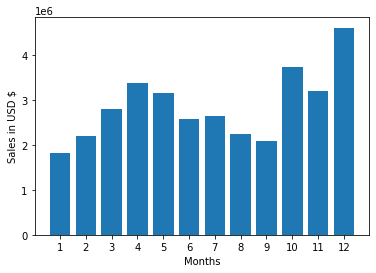

In [24]:
months = range(1,13)
results = all_data.groupby("Month").sum()

plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD $")

plt.bar(months,results["Sales"])
plt.show()

In [25]:
results.max()

Quantity Ordered      28114.00
Price Each          4588415.41
Sales               4613443.34
dtype: float64

In [26]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales'],
      dtype='object')

# which city with heighest number of sales: 


In [27]:
# add a city column


In [28]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [29]:
def get_city(add):
    return add.split(",")[1]

In [30]:
def get_state(add):
    return add.split(",")[2].split(" ")[1]

In [31]:
all_data["Purchase Address"].apply(lambda x:x.split(",")[1])

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [32]:
# lets use .apply method

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/2736030101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [33]:
city_data = all_data.groupby("City").sum()
city_data

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


In [34]:
city_data.sort_values(by="Quantity Ordered",ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Atlanta (GA),16602,2779908.20,104794,2795498.58
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


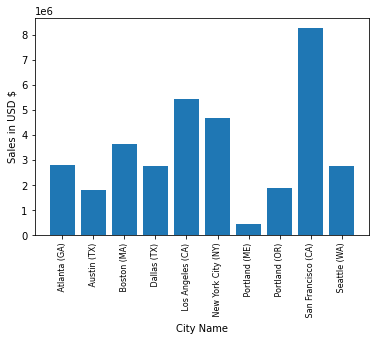

In [35]:
# cities = all_data["City"].unique()

cities = [c for c,df in all_data.groupby("City")]

plt.bar(cities,city_data["Sales"])
plt.xticks(cities,rotation = "vertical",size = 8)
plt.xlabel("City Name")
plt.ylabel("Sales in USD $")


plt.show()

In [36]:
cities

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

In [37]:
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [38]:
all_data["State"] = all_data["Purchase Address"].apply(lambda x:get_state(x))
all_data.head(10)

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/406652374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["State"] = all_data["Purchase Address"].apply(lambda x:get_state(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),CA
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),WA
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),GA
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),CA
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),MA


In [39]:
state_data = all_data.groupby("State").sum()
state_data

,Quantity Ordered,Price Each,Month,Sales
State,,,,
CA,83528,13632896.97,523845,13714774.71
GA,16602,2779908.20,104794,2795498.58
MA,22528,3637409.77,141112,3661642.01
ME,2750,447189.25,17144,449758.27
NY,27932,4635370.83,175741,4664317.43
OR,11303,1860558.22,70621,1870732.34
TX,27883,4562501.43,174449,4587557.15
WA,16553,2733296.01,104941,2747755.48


In [40]:
state_data.sort_values(by="Quantity Ordered",ascending=False)

,Quantity Ordered,Price Each,Month,Sales
State,,,,
CA,83528,13632896.97,523845,13714774.71
NY,27932,4635370.83,175741,4664317.43
TX,27883,4562501.43,174449,4587557.15
MA,22528,3637409.77,141112,3661642.01
GA,16602,2779908.20,104794,2795498.58
WA,16553,2733296.01,104941,2747755.48
OR,11303,1860558.22,70621,1870732.34
ME,2750,447189.25,17144,449758.27


Text(0, 0.5, 'Sales in USD $')

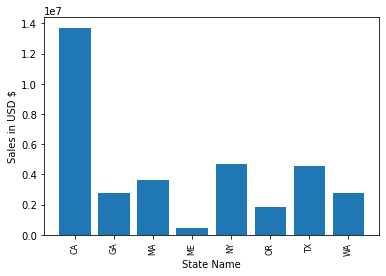

In [41]:

state = [c for c,df in all_data.groupby("State")]

plt.bar(state,state_data["Sales"])
plt.xticks(state,rotation = "vertical",size = 8)
plt.xlabel("State Name")
plt.ylabel("Sales in USD $")


# what time we should display  advertisments to maximise likelyhood of customer's buying product? 

In [42]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA


In [43]:
#conver the order date object into datetime object


In [44]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/2617628323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


In [45]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA


In [46]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/3591046670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Hour"] = all_data["Order Date"].dt.hour
C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/3591046670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Minute"] = all_data["Order Date"].dt.minute


In [47]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),CA,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),CA,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),CA,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),CA,17,30


In [48]:
hours = [hr for hr,df in all_data.groupby("Hour")]

In [49]:
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

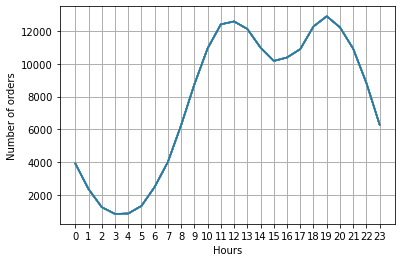

In [50]:
plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.grid(linewidth=1,)

plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of orders")

plt.show()


# recommedation is 12pm to 1 pm at noon    and 7pm to 9pm evening 

In [51]:
all_data.groupby("Hour").count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Minute
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


# which products are sold together 

In [52]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),CA,13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),WA,7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),GA,10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),CA,10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),MA,14,5


In [53]:
all_data.shape

(185950, 12)

In [54]:
all_data["Order ID"].duplicated(keep=False)  # this will keep all the duplicates together ... 

# it will mark true for all dulicate values

0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185950, dtype: bool

In [55]:
groupedf = all_data[all_data["Order ID"].duplicated(keep = False)]

In [56]:
groupedf.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),MA,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),MA,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),CA,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),CA,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),NY,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),NY,11,7


In [57]:
groupedf["Group Order"] = groupedf.groupby("Order ID")["Product"].transform(lambda  x : ",".join(x) )
groupedf.head()

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/1351202419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupedf["Group Order"] = groupedf.groupby("Order ID")["Product"].transform(lambda  x : ",".join(x) )


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Group Order
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [58]:
uniq_orders = groupedf[["Order ID","Group Order"]].drop_duplicates()

In [59]:
uniq_orders.head(20)

,Order ID,Group Order
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [60]:
uniq_orders.describe()

,Order ID,Group Order
count,7136,7136
unique,7136,366
top,176560,"iPhone,Lightning Charging Cable"
freq,1,882


In [61]:
from collections import Counter

In [62]:
from itertools import combinations

In [63]:
freq = Counter()
for r in groupedf["Group Order"]:
    row_list = r.split(",")
    freq.update(Counter(combinations(row_list,2)))
print(freq)
freq.most_common(15)

Counter({('iPhone', 'Lightning Charging Cable'): 2140, ('Google Phone', 'USB-C Charging Cable'): 2116, ('iPhone', 'Wired Headphones'): 987, ('Google Phone', 'Wired Headphones'): 949, ('iPhone', 'Apple Airpods Headphones'): 799, ('Vareebadd Phone', 'USB-C Charging Cable'): 773, ('Google Phone', 'Bose SoundSport Headphones'): 503, ('USB-C Charging Cable', 'Wired Headphones'): 452, ('Vareebadd Phone', 'Wired Headphones'): 327, ('Lightning Charging Cable', 'Wired Headphones'): 253, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 214, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 211, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 182, ('Apple Airpods Headphones', 'Wired Headphones'): 170, ('Bose SoundSport Headphones', 'Wired Headphones'): 140, ('Lightning Charging Cable', 'USB-C Charging Cable'): 120, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 114, ('Lightning Charging Cable', 'Lightning Charging Cable'): 111, ('AA Batteries (4-pack)', 'Lightning Chargi

[(('iPhone', 'Lightning Charging Cable'), 2140),
 (('Google Phone', 'USB-C Charging Cable'), 2116),
 (('iPhone', 'Wired Headphones'), 987),
 (('Google Phone', 'Wired Headphones'), 949),
 (('iPhone', 'Apple Airpods Headphones'), 799),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 773),
 (('Google Phone', 'Bose SoundSport Headphones'), 503),
 (('USB-C Charging Cable', 'Wired Headphones'), 452),
 (('Vareebadd Phone', 'Wired Headphones'), 327),
 (('Lightning Charging Cable', 'Wired Headphones'), 253),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 214),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 211),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 182),
 (('Apple Airpods Headphones', 'Wired Headphones'), 170),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 140)]

In [64]:
max(freq.values())

2140

In [65]:
for k,v in freq.most_common(15):
    print(k,v)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253
('Lightning Charging Cable', 'Apple Airpods Headphones') 214
('USB-C Charging Cable', 'Bose SoundSport Headphones') 211
('Vareebadd Phone', 'Bose SoundSport Headphones') 182
('Apple Airpods Headphones', 'Wired Headphones') 170
('Bose SoundSport Headphones', 'Wired Headphones') 140


In [66]:
freq = Counter()
for r in groupedf["Group Order"]:
    row_list = r.split(",")
    freq.update(Counter(combinations(row_list,3)))
for k,v in freq.most_common(10):
    print(k,v)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 271
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 193
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 146
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 109
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 101
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 86
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 75
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 50
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 17


# which product sold the most and why ? 

In [67]:
all_data.groupby("Product").sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [68]:
product_data = all_data.groupby("Product")

In [69]:
quantity_ordered = product_data.sum()["Quantity Ordered"]

In [70]:
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [71]:
products = [pr for pr,df in product_data]
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

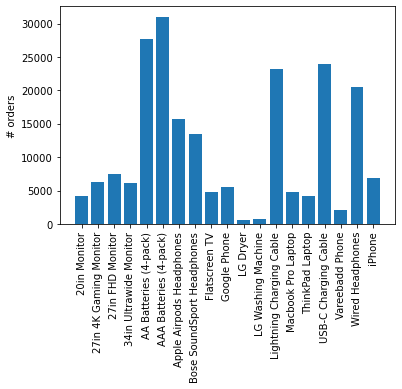

In [72]:
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation = "vertical")
plt.ylabel("# orders")
plt.show()


In [73]:
product_prices = all_data.groupby("Product").mean()["Price Each"]

In [74]:
product_prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

#### product vs product price together

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/1896674919.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = "vertical")


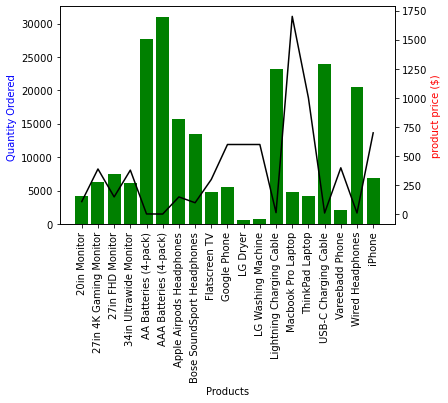

In [75]:
product_prices = all_data.groupby("Product").mean()["Price Each"]

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color = "g")
ax2.plot(products,product_prices,color = "black")


ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered ",color = "b")
ax2.set_ylabel("product price ($)",color = "r")
ax1.set_xticklabels(products,rotation = "vertical")
plt.show()

# -------------------------------------------------------------------------

In [76]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),CA,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),CA,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),CA,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),CA,17,30


In [77]:
all_data.describe()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140,185.490917,14.413305,29.481361
std,0.442793,332.731330,3.502996,332.919771,5.423416,17.317573
min,1.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,1.000000,11.950000,4.000000,11.950000,11.000000,14.000000
50%,1.000000,14.950000,7.000000,14.950000,15.000000,29.000000
75%,1.000000,150.000000,10.000000,150.000000,19.000000,45.000000
max,9.000000,1700.000000,12.000000,3400.000000,23.000000,59.000000


In [90]:
all_data[2:10]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),CA,13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),WA,7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),GA,10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),CA,10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),MA,14,5


In [91]:
df = all_data

In [93]:
df.describe()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140,185.490917,14.413305,29.481361
std,0.442793,332.731330,3.502996,332.919771,5.423416,17.317573
min,1.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,1.000000,11.950000,4.000000,11.950000,11.000000,14.000000
50%,1.000000,14.950000,7.000000,14.950000,15.000000,29.000000
75%,1.000000,150.000000,10.000000,150.000000,19.000000,45.000000
max,9.000000,1700.000000,12.000000,3400.000000,23.000000,59.000000


In [96]:
df.describe(include="object")

,Order ID,Product,Purchase Address,City,State
count,185950,185950,185950,185950,185950
unique,178437,19,140787,10,8
top,160873,USB-C Charging Cable,"193 Forest St, San Francisco, CA 94016",San Francisco (CA),CA
freq,5,21903,9,44732,74337


In [98]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'State', 'Hour',
       'Minute'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   State             185950 non-null  object        
 10  Hour              185950 non-null  int64         
 11  Minute            185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(5)
memory usage: 17.7+ MB


In [108]:
df["Product"].uniqueque() 

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [112]:
len(df["Product"].unique())

19

In [113]:
len(df["Order ID"].unique())

178437

In [114]:
df["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [115]:
df["City"].value_counts()

 San Francisco (CA)    44732
 Los Angeles (CA)      29605
 New York City (NY)    24876
 Boston (MA)           19934
 Atlanta (GA)          14881
 Dallas (TX)           14820
 Seattle (WA)          14732
 Portland (OR)         10010
 Austin (TX)            9905
 Portland (ME)          2455
Name: City, dtype: int64

In [120]:
df["City"].unique()

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

# ==========================

In [317]:
df = pd.read_csv("all_data.csv")
df.shape


(186850, 6)

In [319]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [330]:
df.loc[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


In [339]:
df = df.drop_duplicates(keep="first")
df.shape

(185688, 6)

In [341]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [343]:
df = df.dropna(how = "all")

In [344]:
x  = [i for i in range(len(df))]

In [345]:
df["newcol"] = x

C:\Users\sunny\AppData\Local\Temp/ipykernel_24152/1473548682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["newcol"] = x


In [346]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,newcol
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2


In [347]:
df.drop("newcol",axis = 1,inplace= True)

C:\Users\sunny\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [348]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [349]:
df = df[df["Order Date"].str[0:2] != "Or"] 


df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Order Date"] = pd.to_datetime(df["Order Date"])


df["Sales"] = df["Price Each"] * df["Quantity Ordered"]

In [350]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


In [351]:
df["Sales"].sum()

34465537.94

In [352]:
df[5:9]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",99.99
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",11.95
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.00


In [353]:
df[["Product","Price Each"]][5:16]

,Product,Price Each
6,USB-C Charging Cable,11.95
7,Bose SoundSport Headphones,99.99
8,USB-C Charging Cable,11.95
9,Macbook Pro Laptop,1700.00
10,Wired Headphones,11.99
11,Google Phone,600.00
12,Lightning Charging Cable,14.95
13,27in 4K Gaming Monitor,389.99
14,AA Batteries (4-pack),3.84
15,Lightning Charging Cable,14.95


In [354]:
df.groupby("Product").count()["Quantity Ordered"]

Product
20in Monitor                   4098
27in 4K Gaming Monitor         6225
27in FHD Monitor               7498
34in Ultrawide Monitor         6174
AA Batteries (4-pack)         20558
AAA Batteries (4-pack)        20612
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
Flatscreen TV                  4794
Google Phone                   5522
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21610
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
USB-C Charging Cable          21859
Vareebadd Phone                2065
Wired Headphones              18849
iPhone                         6840
Name: Quantity Ordered, dtype: int64

In [355]:
prd = df.groupby("Product").sum()
prd

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4126,450739.02,453818.74
27in 4K Gaming Monitor,6239,2427687.75,2433147.61
27in FHD Monitor,7541,1124625.02,1131074.59
34in Ultrawide Monitor,6192,2346058.26,2352898.08
AA Batteries (4-pack),27615,78942.72,106041.60
AAA Batteries (4-pack),30986,61629.88,92648.14
Apple Airpods Headphones,15637,2328750.00,2345550.00
Bose SoundSport Headphones,13430,1329667.02,1342865.70
Flatscreen TV,4813,1438200.00,1443900.00


# heighest value order

In [356]:
df["Sales"].max()

3400.0

In [358]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


In [359]:
df[df["Quantity Ordered"] == 9.0]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
81010,226483,AAA Batteries (4-pack),9,2.99,2019-07-20 23:28:00,"867 Sunset St, San Francisco, CA 94016",26.91
81646,227096,AAA Batteries (4-pack),9,2.99,2019-07-29 09:50:00,"60 10th St, San Francisco, CA 94016",26.91
92877,211097,AAA Batteries (4-pack),9,2.99,2019-06-23 08:29:00,"338 Hickory St, Los Angeles, CA 90001",26.91


In [360]:
(df["Quantity Ordered"]).max()

9

In [361]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


In [362]:
dfx = df.set_index("Product")
dfx

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Product,,,,,,
USB-C Charging Cable,176558,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
Bose SoundSport Headphones,176559,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
Google Phone,176560,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
Wired Headphones,176560,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
Wired Headphones,176561,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...
AAA Batteries (4-pack),259353,3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
iPhone,259354,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
iPhone,259355,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00


In [363]:
dfx["Sales"].loc["iPhone"].min()

700.0

In [364]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


In [365]:
df.iloc[5:10,1:3]

,Product,Quantity Ordered
6,USB-C Charging Cable,1
7,Bose SoundSport Headphones,1
8,USB-C Charging Cable,1
9,Macbook Pro Laptop,1
10,Wired Headphones,1


In [366]:
dfx

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Product,,,,,,
USB-C Charging Cable,176558,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
Bose SoundSport Headphones,176559,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
Google Phone,176560,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
Wired Headphones,176560,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
Wired Headphones,176561,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...
AAA Batteries (4-pack),259353,3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
iPhone,259354,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
iPhone,259355,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00


In [370]:
dfx.sort_values(by = "Sales")

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Product,,,,,,
AAA Batteries (4-pack),166406,1,2.99,2019-03-08 10:01:00,"933 Madison St, Los Angeles, CA 90001",2.99
AAA Batteries (4-pack),189009,1,2.99,2019-04-12 12:51:00,"153 Cherry St, San Francisco, CA 94016",2.99
AAA Batteries (4-pack),168004,1,2.99,2019-03-15 12:40:00,"952 Lakeview St, San Francisco, CA 94016",2.99
AAA Batteries (4-pack),298964,1,2.99,2019-12-30 18:38:00,"348 10th St, Atlanta, GA 30301",2.99
AAA Batteries (4-pack),298963,1,2.99,2019-12-19 06:59:00,"22 Washington St, New York City, NY 10001",2.99
...,...,...,...,...,...,...
ThinkPad Laptop,278637,2,999.99,2019-10-02 16:06:00,"643 Cedar St, Boston, MA 02215",1999.98
Macbook Pro Laptop,181544,2,1700.00,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",3400.00
Macbook Pro Laptop,200528,2,1700.00,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",3400.00
